# MCS 275 Spring 2024 Worksheet 11

* Course instructor: Emily Dumas

## Topics

This worksheet focuses on **SQLite databases**.  (Last week we also had one lecture about HTML, and we'll come back to that in the next worksheet.)

## Resources

These things might be helpful while working on the problems.  Remember that for worksheets,  we don't strictly limit what resources you can consult, so these are only suggestions.

* [Lecture 27 - SQL queries](http://dumas.io/teaching/2024/spring/mcs275/slides/lecture27.html)
* [Lecture 28 - SQL CRUD example](http://dumas.io/teaching/2024/spring/mcs275/slides/lecture28.html)
* [Lecture 29 - HTML and CSS](http://dumas.io/teaching/2024/spring/mcs275/slides/lecture29.html)

* Documentation:
    * [SQLite SQL command reference](https://www.sqlite.org/lang.html)
    * [SQLite command line shell documentation](https://www.sqlite.org/cli.html)
    * [SQLite tutorial](https://www.sqlitetutorial.net/)
* Course sample code:
    * [sql examples](https://github.com/daviddumas/mcs275spring2024/tree/main/samplecode/databases)
    * [sample queries of the power plant database](https://github.com/daviddumas/mcs275spring2024/blob/main/samplecode/databases/powerplants-queries.sql)

* [Downey's book, *Think Python*](https://greenteapress.com/thinkpython2/html/)
* MCS 260 course materials from Fall 2021:
    * [Slides, homework, worksheets, and projects](https://www.dumas.io/teaching/2021/fall/mcs260/)
    * [MCS 260 Sample programs](https://github.com/daviddumas/mcs260fall2021/tree/main/samplecode)

## Strongly recommended: Get SQLite command line shell

As I said in class, you don't strictly need the SQLite command line shell to do anything with SQLite.  You can instead write a Python program every time you want to execute a SQL statement.  But I think having it makes it much easier to test out and debug queries because it offers the same kind of Read-Evaluate-Print Loop (REPL) that makes the Python interactive mode so useful.

I recommend trying the steps below before lab if you can, or at the start of lab if you don't have time to do it beforehand.

### Installation

Lectures 27 and 28 discussed how to install the command line shell.  For MacOS and Linux, there's usually nothing you need to do.  Here is a quick video showing the steps to install it under windows 10.  It is very similar in windows 11.
* [Windows 10 installation of SQLite command line shell](https://youtu.be/6chDaT7yMl0)  <--- **WATCH THIS IF YOU USE WINDOWS**

Here are more detailed written installation instructions by platform. 

* If you use **Windows**, you need to install it yourself.  The installation doesn't look like the graphical ones you may be used to, with a window and buttons guiding you through the steps.  Instead you download a zip file and extract it.  The whole thing is relatively quick, but the steps below are described in some detail, so the written instructions are a bit long.  (Consider just [watching the 1-minute video](https://youtu.be/6chDaT7yMl0) and following along instead.)
    1. Go to [https://www.sqlite.org/download.html](https://www.sqlite.org/download.html).
    1. Scroll down to the heading **Precompiled Binaries for Windows**
    1. In that section, click on the link whose name begins with `sqlite-tools-win32-x86-`.  The description next to the link should begin: *A bundle of command-line tools for managing SQLite database files*
    1. The download should either begin immediately, or you'll be asked if you want to download the file.  If prompted, save it somewhere you know how to find in the file explorer.
    1. Find the ZIP file you just downloaded and open it in the file explorer (either by clicking the filename where the web browser shows a recent download, or by opening the file explorer and navigating to the place where you saved the ZIP file).
    1. This should open a new explorer window in which you browse the contents of the ZIP file.  It contains a folder with a name like `sqlite-tools-win32-x86-3380200`.  Double click to enter that folder.
    1. You should now see a list of three files, named
        * `sqldiff.exe`
        * `sqlite3.exe`
        * `sqlite3_analyzer.exe`
        
       However, the `.exe` may be missing if explorer is configured to hide file extensions (the default).
    1. Of these, `sqlite3.exe` is the only one you want.  Drag that file to the desktop to extract a copy of it.
    1. You should now see a `sqlite3` icon on the desktop.  Don't click it; we'll work in the terminal instead.
    1. Open a terminal (Windows Terminal or PowerShell) and change directory to the desktop (e.g. with `cd Desktop` or `cd C:\Users\myusername\Desktop` or `cd C:\Users\myusername\OneDrive\Desktop`, depding on where PowerShell opens and whether you use OneDrive desktop backup)
    1. Test running the command line shell by entering this command in powershell: `.\sqlite3.exe`
    1. Now SQLite should display a startup message and prompt.  **Success!**
    1. Exit the SQLite command line shell with `.exit` to return to PowerShell

* If you use **Linux** or **MacOS**, SQLite's command line shell is almost always pre-installed.  Type `sqlite3` in a terminal and press enter.  Success (meaning it is already installed) looks something like this:
```
sqlite3
SQLite version 3.31.1 2020-01-27 19:55:54
Enter ".help" for usage hints.
Connected to a transient in-memory database.
Use ".open FILENAME" to reopen on a persistent database.
sqlite>
```
(at which point you'd want to exit using command `.exit`)
Failure (meaning it is not already installed) looks something like this:
```
$ sqlite3
sqlite3: command not found
```
If you use Linux or MacOS and SQLite's command line shell is not already installed, contact your TA or instructor for help.

### Tips for working with SQLite command line shell

#### Know how to tell which REPL is open, and how to exit SQLite

Any time you have your terminal open, there are three situations you may find yourself in:
1. The terminal itself is waiting for a command from you.  If this is the case, you'll see a prompt like
```
PS C:\Users\ddumas\Desktop>
```
or
```
$
```
2. The Python REPL is running, and waiting for a Python statement from you.  If this is the case, you'll see a prompt
```
>>>
```
and you can quit back to the terminal using the command `exit()`.

3. The SQLite command line shell is running, and is waiting for a SQL command from you. If this is the case, you'll see a prompt
```
sqlite>
```
and you can quit back to the terminal using the command `.exit`


To summarize


   When running       | prompt looks like | exit with | and then
:---------------------|:------------------|:----------|:-----------------
Terminal (Windows)    | `PS C:\Users>`    | `exit`    | window closes
Terminal (Mac/Linux)  | `$`               | `exit`    | window closes
Python                | `>>>`             | `exit()`  | back to terminal
SQLite                | `sqlite>`         | `.exit` or `.quit`  | back to terminal


#### Know how to open a file from within the SQLite command line shell
For Windows users, it's worthwhile keeping `sqlite3.exe` in a place you can easily find when using the terminal, such as the desktop.  However, your database files may be in some other directory (e.g. one where you keep MCS 275 files).  To open a database from within the SQLite command line shell, use a command like
```
.open "C:\Users\orodrigo\Desktop\MCS 275 work\powerplants.sqlite"
```

Note that this will create an empty database if you use a filename that doesn't exist.  If you want to test your path to make sure the database exists first, you can use something like
```
.open --readonly "C:\Users\orodrigo\Desktop\MCS 275 work\powerplants.sqlite"
```
which opens the database in "read-only mode", and will **not** create an empty database if the file is missing.  (If you intend to change the data, this command can confirm you have the path correct, but you'll need to do a regular `.open` afterward to allow writes.)

## 1. Get the sample database working

Download this file and put it somewhere you can find (that is, a directory for which you know the full path).

* [powerplants.sqlite](https://www.dumas.io/teaching/2024/spring/mcs275/data/powerplants.sqlite)

The only table in this database is called `powerplants`, and the columns present in that table are described at

* [Lecture 27 Slide 10](https://www.dumas.io/teaching/2024/spring/mcs275/slides/lecture27.html#/10)

To confirm you can open the database using the SQLite command line shell:

* Open your terminal
* Run the SQLite command line shell (may require changing directory to the one containing `sqlite3.exe`).  You'll know it is running if you are waiting at a `sqlite>` prompt.
* Open the `powerplants.sqlite` database file by specifying its full path, in quotes, as an argument to the `.open` command, e.g.
   ```
   .open --readonly "C:\Users\myusername\Desktop\MCS 275 work\powerplants.sqlite
   ```
  and a typical Linux or MacOS terminal command would be
   ```
   sqlite3 powerplants.sqlite
   ```
   After pressing enter, you should see that SQLite is running and waiting for a command with the prompt
   ```
* **KEY STEP**: Check that SQLite actually opened the star database file, rather than some database file that you may have accidentally created at some other time.  Do this by asking SQLite's command line shell to list tables in the database:
    ```
    .tables
    ```
    **If everything is working, the output should look like this:**
    ```
    sqlite> .tables
    powerplants
    sqlite>
    ```
    If you instead see this:
    ```
    sqlite> .tables
    sqlite>
    ```
    then it means you opened an empty database file.  Check the location of the `powerplants.sqlite` file using a file browser.  It should have a size of about 4 megabytes.


If you are working **without** the SQLite command line shell, I suggest you instead try editing the [powerplantinfo.py](https://github.com/daviddumas/mcs275spring2024/blob/main/samplecode/databases/powerplantinfo.py) script from the course sample code repo to have the correct path to the file you downloaded, and confirm that it runs successfully (thus showing SQLite was able to open the file).

## 2. Power plant queries

I recommend working on these in the SQLite command line shell.  Remember, the commands
```
.headers on
.mode column
```
will tell SQLite to present output in a more readable format.


Use SQL queries run against the power plant database to answer these questions.  (You should consider both the query and its return value as part of the answer.)

### 2A.  Largest by country

For each country below, what is the name, primary fuel, and generation capacity (in MW) of the largest power plant in the database?

* United States of America
* India
* Brazil
* China
* Australia
* France

### 2B. Hyperborean radionuclides

Find the northernmost nuclear power plant in the database.  What country is it in?  What is its location (in latitude, longitude)?  What is its generation capacity?

### 2C. Almost prime meridian wind

What countries contain wind power plants listed in this database that are located within 5 degrees longitude on either side of the prime meridian?

And among these, which ones contain large wind plants, if we define that as 200MW or greater?

### 2D. Output availability

There are columns in the database for net energy output in each of the years 2014 to 2019.  But in many cases this information is not available.

What fraction of the power plants listed in the database have output information for 2017?

What fraction of the power plants listed in the database have output information for all of the years 2014 to 2019?


## 3. Programming joke utility

### Expressions in SQL

There is a new SQLite feature (or more precisely, a feature of the SQL dialect that SQLite uses for queries) that you'll need to use in this problem.

In many places where we've used column names in our queries, you can also use expressions that apply arithmetic operators and other functions to the values in the columns.  For example, if a database of MCS 275 grades has columns called `project3pct` and `project4pct`, then this query would return the email addresses of students whose grades on those two projects differed by more than 10 percent:
```
SELECT email FROM mcs275roster WHERE ABS(project3pct - project4pct) > 10;
```
You can also use expressions like this in the requested list of output columns.  For example, this query would get the average of project 3 and 4 percentages for all students, listed in alphabetical order by last name.
```
SELECT lastname, firstname, 0.5*(project3pct + project4pct) FROM mcs275roster ORDER BY lastname;
```
Such expressions can also be used after `ORDER BY` to make a custom sort.

You can find lists of built-in functions in SQLite in the documentation:
* [SQL core functions](https://sqlite.org/lang_corefunc.html)
* [SQL math functions](https://sqlite.org/lang_mathfunc.html)

### The task

Write a program that stores, delivers, and ranks programming jokes using a SQLite database.  It should support three operations:
* Add a joke: The user provides a string and the program adds it to the joke table.  In addition to the joke itself, the joke table has columns to store the number of times a joke has been told, and how many times it was successful in amusing the user.
* Tell a joke: A random joke is selected and displayed.  The user is asked if they found it amusing.  Their answer is recorded by updating the relevant counts (times told, times successful) for that row.
* Best jokes list:  Among jokes that have succeeded at least once, display the top 5 ranked by success rate (ratio of times successful to times told).

The program should create the database and table it needs if they don't already exist.  Otherwise, it should open and use the existing database.

The three functions should be selected using command line arguments.  The first command line argument is always the command---one of `add`, `tell`, or `best`.  If the command is `add`, then a second command line argument is required, which is the joke itself.  If the command is `tell`, no other arguments are required but the user is prompted for their approval/disapproval of the joke through keyboard input.

**Hints:**
1. I think the "task list" application in the course sample code repository would be a good thing to look at while working on this.
1. I suggest making a table that has a column of type `INTEGER PRIMARY KEY` so you have a way to uniquely refer to rows.
1. Remember the clause `ORDER BY RANDOM() LIMIT 1` is an SQL idiom for making a query return a random row from among the ones it would otherwise return.
1. In a SQLite query, if columns `A` and `B` both have type integer then `A/B` computes the *integer* division of `A` by `B`.  In contrast, `1.0*A/B` would give the true quotient because the multiplication by 1.0 converts `A` to a float (or `REAL`, in SQLite terminology).

Save the program as `jokedb.py`.

Here is a sample session of what using it should look like. (These are from a linux terminal session, where the terminal prompt is "$".  In Windows PowerShell, the prompt will look a bit different.)

```
$ python3 jokedb.py tell
ERROR: No jokes in database.

[... now suppose several jokes are added ...]

$ python3 jokedb.py tell
There are 10 types of people in the world: Those who understand binary, and those who don't.

Were you amused by this? (Y/N)y

$ python3 jokedb.py tell
The two hardest things in programming are naming things, cache invalidation, and off-by-one errors.

Were you amused by this? (Y/N)n

$ python3 jokedb.py add "Most people agree that there were no widely-used high-level programming languages before FORTRAN.  Unfortunately, there is no agreement on whether this makes FORTRAN the 1st such language, or the 0th."

$ python3 jokedb.py tell
Python developers rarely decorate the walls of their offices. They consider whitespace to be significant.

Were you amused by this? (Y/N)y

$ python3 jokedb.py best
-------------------------------------------------------
#1 with 100% success rate after 8 tellings:
Knock knock.
Race condition.
Who's there?
-------------------------------------------------------
#2 with 71% success rate after 7 tellings:
There are 10 types of people in the world: Those who understand binary, and those who don't.
-------------------------------------------------------
#3 with 67% success rate after 6 tellings:
A software testing engineer walks into a bar and orders a refrigerator, -1 glasses of water, and INT_MAX+1 cans of soda.
-------------------------------------------------------
#4 with 60% success rate after 5 tellings:
Python developers rarely decorate the walls of their offices. They consider whitespace to be significant.
-------------------------------------------------------
#5 with 50% success rate after 4 tellings:
The two hardest things in programming are naming things, cache invalidation, and off-by-one errors.

$
```

## 4. Extra: Power plant visualization

Work on this if you complete the problems above.

Here's a scatter plot of all the powerplants in the database that can produce at least 200MW, and the matplotlib code that created it.

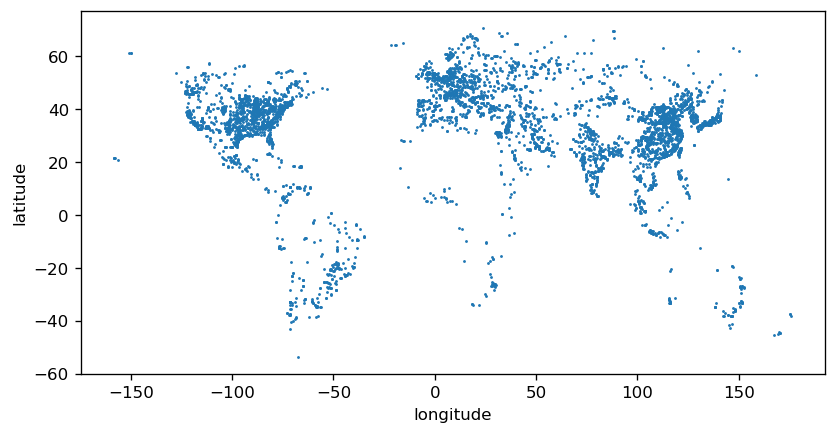

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

# Edit path below if needed
con = sqlite3.connect("powerplants.sqlite")

res = con.execute("""
SELECT latitude,longitude
FROM powerplants
WHERE capacity_mw > 200;
""")

longitudes = []
latitudes = []
for row in res:
    latitudes.append(row[0])
    longitudes.append(row[1])

# Optional: Convert to arrays, which would make it easier
# to do arithmetic or transformations on them.
longitudes = np.array(longitudes)
latitudes = np.array(latitudes)

# Make the plot
plt.figure(figsize=(8,4),dpi=120)
plt.scatter(longitudes,latitudes,s=0.5)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

Refine this to plot as follows:
* Only show power plants in the lower 48 states of the USA (limit by country in query and adjust axes limits in matplotlib)
* Have different fuels shown in different colors
* Make the size of each dot depend on the capacity of the powerplant

(For a real geographic visualization, you'd want to do more---such as adding a legend describing which colors correspond to which types, the outlines of the continents, etc.---but this is a start!)

### Revision history

* 2024-03-24 Initial release